In [1]:
!pip install statsmodels

You should consider upgrading via the 'c:\users\m shafay amjad\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


### Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse # Root Mean Square Error
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense , LSTM, Dropout
import warnings
warnings.filterwarnings("ignore")

#### Data Loading 

In [3]:
df = pd.read_csv("Datasets/airlines.csv", names =['Date', 'Passengers'])

In [4]:
df.Date =pd.to_datetime(df.Date)

In [5]:
df.set_index('Date', inplace = True) # Setting the index

In [6]:
df


,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [7]:
train, test = df[: -12], df[-12:] # last 12 years as test


In [8]:
scaler = MinMaxScaler() # Min Max Scalar
scaler.fit(train) # fit the training data set on min max scalling 
train = scaler.transform(train)

test = scaler.transform(test)

#### Neural Network 

In [9]:
n_inputs = 12  # for the input feature  # how many months you want to predict
n_feature = 1 # Since we have only one feature 


generator = TimeseriesGenerator(data = train, targets = train, length = n_inputs, batch_size = 6) # 

model = Sequential()

In [24]:
model.add(LSTM(200, activation = 'relu', input_shape = (n_inputs, n_feature)))
model.add(Dropout(0.15)) # Preventation of Overfitting
model.add (Dense(1))
model.compile(optimizer='rmsprop',
    loss='mse',
    metrics=None,
    loss_weights=None,
    sample_weight_mode=None,
    weighted_metrics=None,)


model.fit_generator(generator=generator, epochs=180)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/180
20/20 [==============================] - 0s 10ms/step - loss: 0.0289
Epoch 2/180
20/20 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 3/180
20/20 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 4/180
20/20 [==============================] - 0s 10ms/step - loss: 0.0097
Epoch 5/180
20/20 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 6/180
20/20 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 7/180
20/20 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 8/180
20/20 [==============================] - 0s 10ms/step - loss: 0.0110
Epoch 9/180
20/20 [==============================] - 0s 10ms/step - loss: 0.0103
Epoch 10/180
20/20 [==============================] - 0s 9ms/step - loss: 0.0095
Epoch 11/180
20/20 [==============================] - 0s 9ms/step - loss: 0.0120
Epoch 12/180
20/20 [=================

In [34]:
pred_list = []

batch = train[-n_inputs:].reshape((1, n_inputs, n_feature))

In [35]:
batch[0]

array([[0.56263736],
       [0.52307692],
       [0.66373626],
       [0.64175824],
       [0.69450549],
       [0.80879121],
       [0.97582418],
       [1.        ],
       [0.78901099],
       [0.66593407],
       [0.56703297],
       [0.66153846]])

In [36]:
for i in range(n_inputs):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]], axis = 1 ) 
    
    # uses the previous month for the batch and from that month adds the prediction for the next one 
    
    # reuse the same batch for the input

In [37]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index = df[-n_inputs:].index, columns = ['Predictions'])
# gets the predictions now put them in the main dataframe

df_test = pd.concat([df_predict, df], axis = 1) # Two columns 



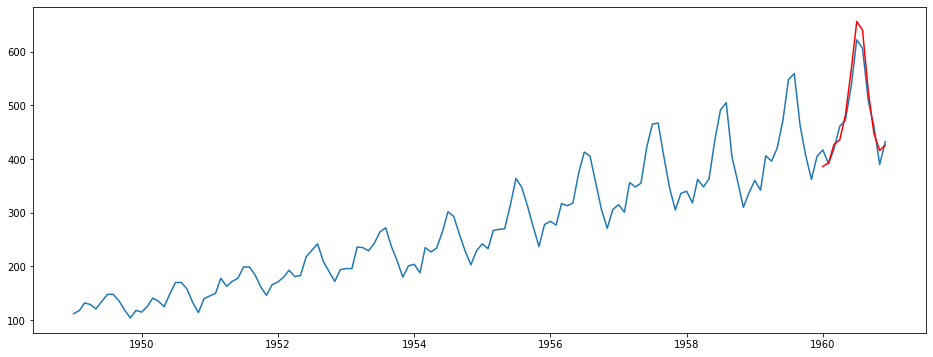

In [39]:
plt.figure(figsize = (16,6))
plt.plot(df_test.index, df_test['Passengers'])
plt.plot(df_test.index, df_test.Predictions, color = 'r')
plt.show()